## Name: Luke Nelson
## Student ID: 5281493709

# <center> Homework 3 </center>

In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from sklearn.preprocessing import StandardScaler
import re
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import shutil
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

### 1. Time Series Classification
### An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network
### (a) Download the AReM data. Some of the data files need very minor cleaning.

In [6]:
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [3]:
#Delete clean data folder if it is already in existence
'''
try:
    dest = os.path.join(fileDir, '../data/clean_data')
    dest = os.path.abspath(os.path.realpath(dest))
    shutil.rmtree(dest)
except:
    print('Please proceed')
'''

In [4]:
#Copy Data folder to new folder called clean_data
'''
fileDir = os.path.dirname(os.path.realpath('__file__'))
filename = os.path.join(fileDir, '../data/AReM')
filename = os.path.abspath(os.path.realpath(filename))
dest = os.path.join(fileDir, '../data/clean_data')
dest = os.path.abspath(os.path.realpath(dest))
desinationt=shutil.copytree(filename, dest)
'''

#### This is how I bring in the datasets that do not require cleaning

In [18]:
filename = os.path.join(fileDir, '../data/clean_data/bending1/dataset1.csv')
filename = os.path.abspath(os.path.realpath(filename))
df=pd.read_csv(filename, skiprows=4, index_col='# Columns: time')   #Read in the .csv file
df.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
# Columns: time,,,,,,
0,39.25,0.43,22.75,0.43,33.75,1.3
250,39.25,0.43,23.00,0.00,33.00,0.0
500,39.25,0.43,23.25,0.43,33.00,0.0
750,39.50,0.50,23.00,0.71,33.00,0.0
1000,39.50,0.50,24.00,0.00,33.00,0.0


#### Some data cleaning below:

In [6]:
#bending2/dataset4.csv has all data in one column. Bring in dataframe
'''
filename = os.path.join(fileDir, '../data/clean_data/bending2/dataset4.csv')
filename = os.path.abspath(os.path.realpath(filename))
df=pd.read_csv(filename, index_col=None, skiprows=5, sep=' ', header=None)   #Read in the .csv file
df=df.drop(df.columns[[7]], axis=1) #Drop the column NaN
df.columns=['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
df.set_index('# Columns: time', inplace = True)
df.head()
'''

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
# Columns: time,,,,,,
0,32.50,0.50,0.0,0.0,19.0,1.00
250,32.50,0.50,0.0,0.0,18.5,0.50
500,32.75,0.43,1.0,0.0,18.0,0.00
750,32.50,0.50,0.0,0.0,17.5,0.50
1000,32.50,0.50,7.5,0.5,17.5,0.87


In [7]:
#Save this file over 
'''
df1 = pd.DataFrame({'a':[np.nan] * 4})
df1.to_csv(filename, index=False, header=None)
df.to_csv(filename,mode='a')
'''

In [8]:
#sitting/dataset8.csv is missing a row just above row 60 where time should be 13500
'''
filename = os.path.join(fileDir, '../data/clean_data/sitting/dataset8.csv')
filename = os.path.abspath(os.path.realpath(filename))
df=pd.read_csv(filename, skiprows=4, index_col=None)   #Read in the .csv file
line = pd.DataFrame({'# Columns: time':13500,'avg_rss12': np.nan, "var_rss12": np.nan,'avg_rss13':np.nan,'var_rss13':np.nan,'avg_rss23':np.nan,'var_rss23':np.nan}, index=[480])
df = df.append(line, ignore_index=False)
df['# Columns: time']=df['# Columns: time'].astype(int)
df.set_index('# Columns: time', inplace = True)
df = df.sort_index()
df=df.fillna(method='ffill')    #Fill the inserted row with the previous of the column
cols=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
df=df[cols]
df.head(56)
'''

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
# Columns: time,,,,,,
0,44.00,0.71,18.75,0.43,7.75,1.30
250,44.00,0.00,18.50,0.50,8.67,0.47
500,43.75,0.83,18.00,0.00,9.67,0.94
750,43.75,0.43,18.25,0.43,9.00,0.00
1000,43.75,0.43,18.00,0.00,9.00,0.00
1250,44.00,0.00,18.25,0.43,10.00,0.00
1500,44.00,0.00,18.00,0.00,10.75,1.09
1750,43.50,0.50,18.00,0.00,11.00,0.71
2000,44.00,0.00,18.00,0.00,12.00,0.00


In [9]:
#Save this file over 
'''
df1 = pd.DataFrame({'a':[np.nan] * 4})
df1.to_csv(filename, index=False, header=None)
df.to_csv(filename,mode='a')
'''

#### I noticed 4 things that needed preprocessing in the datasets. My code creates a copy of the AReM folder so that I could re-run my notebook a number of times. I've commented the code out above, because for two of my data cleaning steps I made the fixes manually in the csv files. Please see explanations of my fixes below.
#### The First:
#### The bending2/dataset4.csv has all data in one column. So that I could read it into python with all of the other datasets using the function I created, I read in this file and resaved the csv so it is in the same format as the rest of the files.
#### The Second:
#### The sitting/dataset8.csv is missing a row just above row 60 where time should be 13500. I used the 'ffill' method to create the missing row and bring in the data ffrom the row previous to fill in the NA values. I brought in the data for row 13250 and then resaved the file in the new clean_data folder. 
#### The last two:
#### When initially attempting to read in the cycling/dataset14.csv and cycling/dataset9.csv files, I got the following error: 
<br> ParserError: Error tokenizing data. C error: Expected 7 fields in line 485, saw 8 <br>
#### I manually went into both of these files in the clean_data folder and deleted column 8, the one directly to the right of var_rss23.

#### Save all datasets as dataframes

In [49]:
#Function to read in all files from the given folder
def df_import(folder):
    dct={}
    dct['instance']=[]
    dct['time series: ndarray']=[]
    dct['activity']=[]
    dct['type']=[]
    fileDir = os.path.dirname(os.path.realpath('__file__'))
    filename = os.path.join(fileDir, '../data/clean_data/'+folder)
    filename = os.path.abspath(os.path.realpath(filename))
    filenames = glob(filename+'/dataset*.csv')
    dataframes = []
    for f in filenames:
        #print(f)
        
        #time series ndarray
        df=pd.read_csv(f, skiprows=4, index_col='# Columns: time')
        ts=df.shape
        dct['time series: ndarray'].append(ts)
        dataframes.append(df)
        
        lst=f.split('/')

        #Instance
        inst=lst[-1]
        inst=re.findall('[0-9]+',inst)
        inst=inst[0]
        inst=int(inst)
        dct['instance'].append(inst)
        
        #activity
        activity=lst[-2]
        dct['activity'].append(activity)
    
        #type
        if folder in ['bending1','bending2']:
            if inst in [1,2]:
                t='test'
            else:
                t='train'
        else:
            if inst in [1,2,3]:
                t='test'
            else:
                t='train'
        dct['type'].append(t)
        new_df=pd.DataFrame(dct)

    return new_df


### (b) Keep datasets 1 and 2 in folders bending1 and bending2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data

In [50]:
#formula above takes care of doing all of this
# use function on all folders

bending1=df_import('bending1')

bending2=df_import('bending2')

cycling=df_import('cycling')

lying=df_import('lying')

sitting=df_import('sitting')

standing=df_import('standing')

walking=df_import('walking')

frames=[bending1, bending2, cycling,lying, sitting, standing, walking]
summary=pd.concat(frames, ignore_index=True)
ind=np.arange(1,89,1)
summary.set_index(ind, inplace = True)

summary



,activity,instance,time series: ndarray,type
1,bending1,7,"(480, 6)",train
2,bending1,6,"(480, 6)",train
3,bending1,4,"(480, 6)",train
4,bending1,5,"(480, 6)",train
5,bending1,1,"(480, 6)",test
6,bending1,2,"(480, 6)",test
7,bending1,3,"(480, 6)",train
8,bending2,6,"(480, 6)",train
9,bending2,4,"(480, 6)",train
10,bending2,5,"(480, 6)",train


### (c) Feature Extraction
### Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features

### (i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc)

#### time-domain features usually used in time series classification are as follows:
#### mean<br> standard deviation<br>skewness<br>kurtosis<br>maximum values<br>minimum values<br>first quartile<br>third quartile<br>median<br>
#### The majority of my research came from the following sources:<br>
https://medium.com/datadriveninvestor/time-series-classification-using-feature-extraction-16209570a22e#:~:text=These%20features%20can%20be%20derived,range%20of%20time%20series%20models.<br>
https://arxiv.org/pdf/2002.12036.pdf<br>
https://stats.stackexchange.com/questions/50807/features-for-time-series-classification<br>

### ii. Extract the time-domain features minimum, maximum,mean, median,standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [51]:
folders=['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
scaler= StandardScaler()    #Use this to standardize the predictors


temp=['1','2','3','4','5','6']
time_domain_dct=dict()



time_domain_dct['Instance']=[]
for i in temp:
    time_domain_dct['min'+i]=[]
    time_domain_dct['max'+i]=[]
    time_domain_dct['mean'+i]=[]
    time_domain_dct['median'+i]=[]
    time_domain_dct['std.dev'+i]=[]
    time_domain_dct['first.quart'+i]=[]
    time_domain_dct['third.quart'+i]=[]

instance=1 

for folder in folders:
    fileDir = os.path.dirname(os.path.realpath('__file__'))
    filename = os.path.join(fileDir, '../data/clean_data/'+folder)
    filename = os.path.abspath(os.path.realpath(filename))
    filenames = glob(filename+'/dataset*.csv')

    for f in filenames:
        df=pd.read_csv(f, skiprows=4, index_col='# Columns: time')
        #scaled=scaler.fit_transform(df)    #Standardize all of the columns. As you can see I've decided to use them directly
        scaled=df.copy()
        
        #Instance column
        time_domain_dct['Instance'].append(instance)
        instance=instance+1
                        
        #min
        minimum=np.min(scaled, axis=0)
        for i in range(len(minimum)):
            time_domain_dct['min'+str(i+1)].append(minimum[i])
        
        #max
        maximum=np.max(scaled, axis=0)
        for i in range(len(maximum)):
            time_domain_dct['max'+str(i+1)].append(maximum[i])
        
        #mean
        mean=np.mean(scaled, axis=0)
        for i in range(len(mean)):
            time_domain_dct['mean'+str(i+1)].append(mean[i])
            
        #median
        med=np.median(scaled, axis=0)
        for i in range(len(med)):
            time_domain_dct['median'+str(i+1)].append(med[i])
            
        #standard deviation
        dev=np.std(scaled, axis=0)
        for i in range(len(dev)):
            time_domain_dct['std.dev'+str(i+1)].append(dev[i])
            
        #first quartile
        firstq=np.percentile(scaled, 25, axis=0)
        for i in range(len(firstq)):
            time_domain_dct['first.quart'+str(i+1)].append(firstq[i])
            
        #third quartile
        thirdq=np.percentile(scaled, 75, axis=0)
        for i in range(len(thirdq)):
            time_domain_dct['third.quart'+str(i+1)].append(thirdq[i])

            
dataset=pd.DataFrame(time_domain_dct)
dataset.set_index('Instance', inplace = True)
#dataset=scaler.fit_transform(dataset)
#dataset=pd.DataFrame(dataset)

In [26]:
dataset.head()

,first.quart1,first.quart2,first.quart3,first.quart4,first.quart5,first.quart6,max1,max2,max3,max4,...,std.dev3,std.dev4,std.dev5,std.dev6,third.quart1,third.quart2,third.quart3,third.quart4,third.quart5,third.quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,43.31,0.43,14.25,0.00,20.5000,0.00,48.00,1.50,26.33,5.17,...,3.738520,0.788162,3.314843,0.487318,44.67,0.50,18.0000,0.94,23.75,0.83
2,42.50,0.00,13.00,0.43,22.2500,0.43,48.00,1.58,27.00,10.03,...,3.843628,0.994724,2.486268,0.621885,45.00,0.50,18.2700,1.12,24.00,0.87
3,39.15,0.00,20.50,0.43,30.4575,0.00,47.75,3.00,30.00,5.15,...,3.806498,0.952736,3.845436,0.523771,45.00,1.12,24.3725,1.30,36.33,1.00
4,41.33,0.43,16.50,0.43,28.4575,0.00,45.75,2.83,28.25,6.42,...,4.082847,0.927833,2.408514,0.388759,42.75,0.71,22.0625,1.12,31.25,0.50
5,39.25,0.00,16.00,0.00,33.0000,0.00,45.00,1.30,29.50,7.23,...,4.458301,0.964652,2.186168,0.582308,42.00,0.50,23.2500,1.12,36.00,1.30


### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.

In [27]:
print(dataset.std(axis=0))

first.quart1    6.153590
first.quart2    0.946386
first.quart3    4.220658
first.quart4    0.843620
first.quart5    6.096465
first.quart6    0.758584
max1            4.394362
max2            5.062729
max3            4.875137
max4            2.183625
max5            5.741238
max6            2.518921
mean1           5.335703
mean2           1.574170
mean3           4.008374
mean4           1.166053
mean5           5.675593
mean6           1.154752
median1         5.440054
median2         1.412244
median3         4.036396
median4         1.145586
median5         5.813782
median6         1.086474
min1            9.569975
min2            0.000000
min3            2.956462
min4            0.000000
min5            6.124001
min6            0.045838
std.dev1        1.770308
std.dev2        0.883182
std.dev3        0.945708
std.dev4        0.457676
std.dev5        1.023802
std.dev6        0.516964
third.quart1    5.138925
third.quart2    2.125266
third.quart3    4.171628
third.quart4    1.552504


In [28]:
columns=list(dataset)
for column in columns:
    sample=dataset.loc[:,column].values
    strappy=bs.bootstrap(sample, stat_func=bs_stats.std, alpha=0.1)
    print(column+': ',strappy)


first.quart1:  6.118526249454473    (5.6223093070070735, 6.684215578218871)
first.quart2:  0.9409936333203218    (0.8513251260897439, 1.0570948442285661)
first.quart3:  4.196608356067418    (3.715901666554216, 4.780763401624446)
first.quart4:  0.8388126951078968    (0.7914266184024704, 0.9072574200688279)
first.quart5:  6.061727225339022    (4.94238539925541, 7.377825730419289)
first.quart6:  0.7542613652413971    (0.7054905433570624, 0.822589626023311)
max1:  4.36932238296287    (3.4947940036985257, 5.436304399865724)
max2:  5.033881679163114    (4.687123978995917, 5.46971146415633)
max3:  4.8473579111726695    (4.263207898578661, 5.535349522727227)
max4:  2.171183073234498    (1.9964981834479159, 2.3751219254312312)
max5:  5.708524426106138    (4.881149505626304, 6.689678134522985)
max6:  2.50456803477282    (2.2634933650725735, 2.7743904306157483)
mean1:  5.305300142199838    (4.7712689488705, 5.915790246354704)
mean2:  1.565199957842158    (1.4322924539002209, 1.7413321170972544)
m

### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

#### The three most important time-domain features I've chosen are median, mean, and max. I like measures of center and think they could be good predictors, and think that max could also be a good predictors. I also like that these features show a fair amount of variation compared to the others.

### (d) Binary Classification Using Logistic Regression
### i. Assume that you want to use the training set to classify bending from other activites, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1,2, and 6 of each instnace, and use color to distinguish bending vs other activities (See p. 129 of the textbook).

In [52]:
#I'm adding the activity to the dataset datafrme and then changing for only bending vs. other
#Bending=1
#Other=0
dataset2=dataset.copy()
dataset2.loc[:,'activity']=summary.loc[:,'activity']
dataset2.loc[dataset2.activity == "bending1", "activity"] = 1
dataset2.loc[dataset2.activity == "bending2", "activity"] = 1
dataset2.loc[dataset2.activity != 1, "activity"] = 0
dataset2.loc[:,'type']=summary.loc[:,'type']
dataset2.head()


,first.quart1,first.quart2,first.quart3,first.quart4,first.quart5,first.quart6,max1,max2,max3,max4,...,std.dev5,std.dev6,third.quart1,third.quart2,third.quart3,third.quart4,third.quart5,third.quart6,activity,type
Instance,,,,,,,,,,,,,,,,,,,,,
1,43.31,0.43,14.25,0.00,20.5000,0.00,48.00,1.50,26.33,5.17,...,3.314843,0.487318,44.67,0.50,18.0000,0.94,23.75,0.83,1,train
2,42.50,0.00,13.00,0.43,22.2500,0.43,48.00,1.58,27.00,10.03,...,2.486268,0.621885,45.00,0.50,18.2700,1.12,24.00,0.87,1,train
3,39.15,0.00,20.50,0.43,30.4575,0.00,47.75,3.00,30.00,5.15,...,3.845436,0.523771,45.00,1.12,24.3725,1.30,36.33,1.00,1,train
4,41.33,0.43,16.50,0.43,28.4575,0.00,45.75,2.83,28.25,6.42,...,2.408514,0.388759,42.75,0.71,22.0625,1.12,31.25,0.50,1,train
5,39.25,0.00,16.00,0.00,33.0000,0.00,45.00,1.30,29.50,7.23,...,2.186168,0.582308,42.00,0.50,23.2500,1.12,36.00,1.30,1,test


In [31]:
#Create Training set
train=dataset2[dataset2['type']=='train']

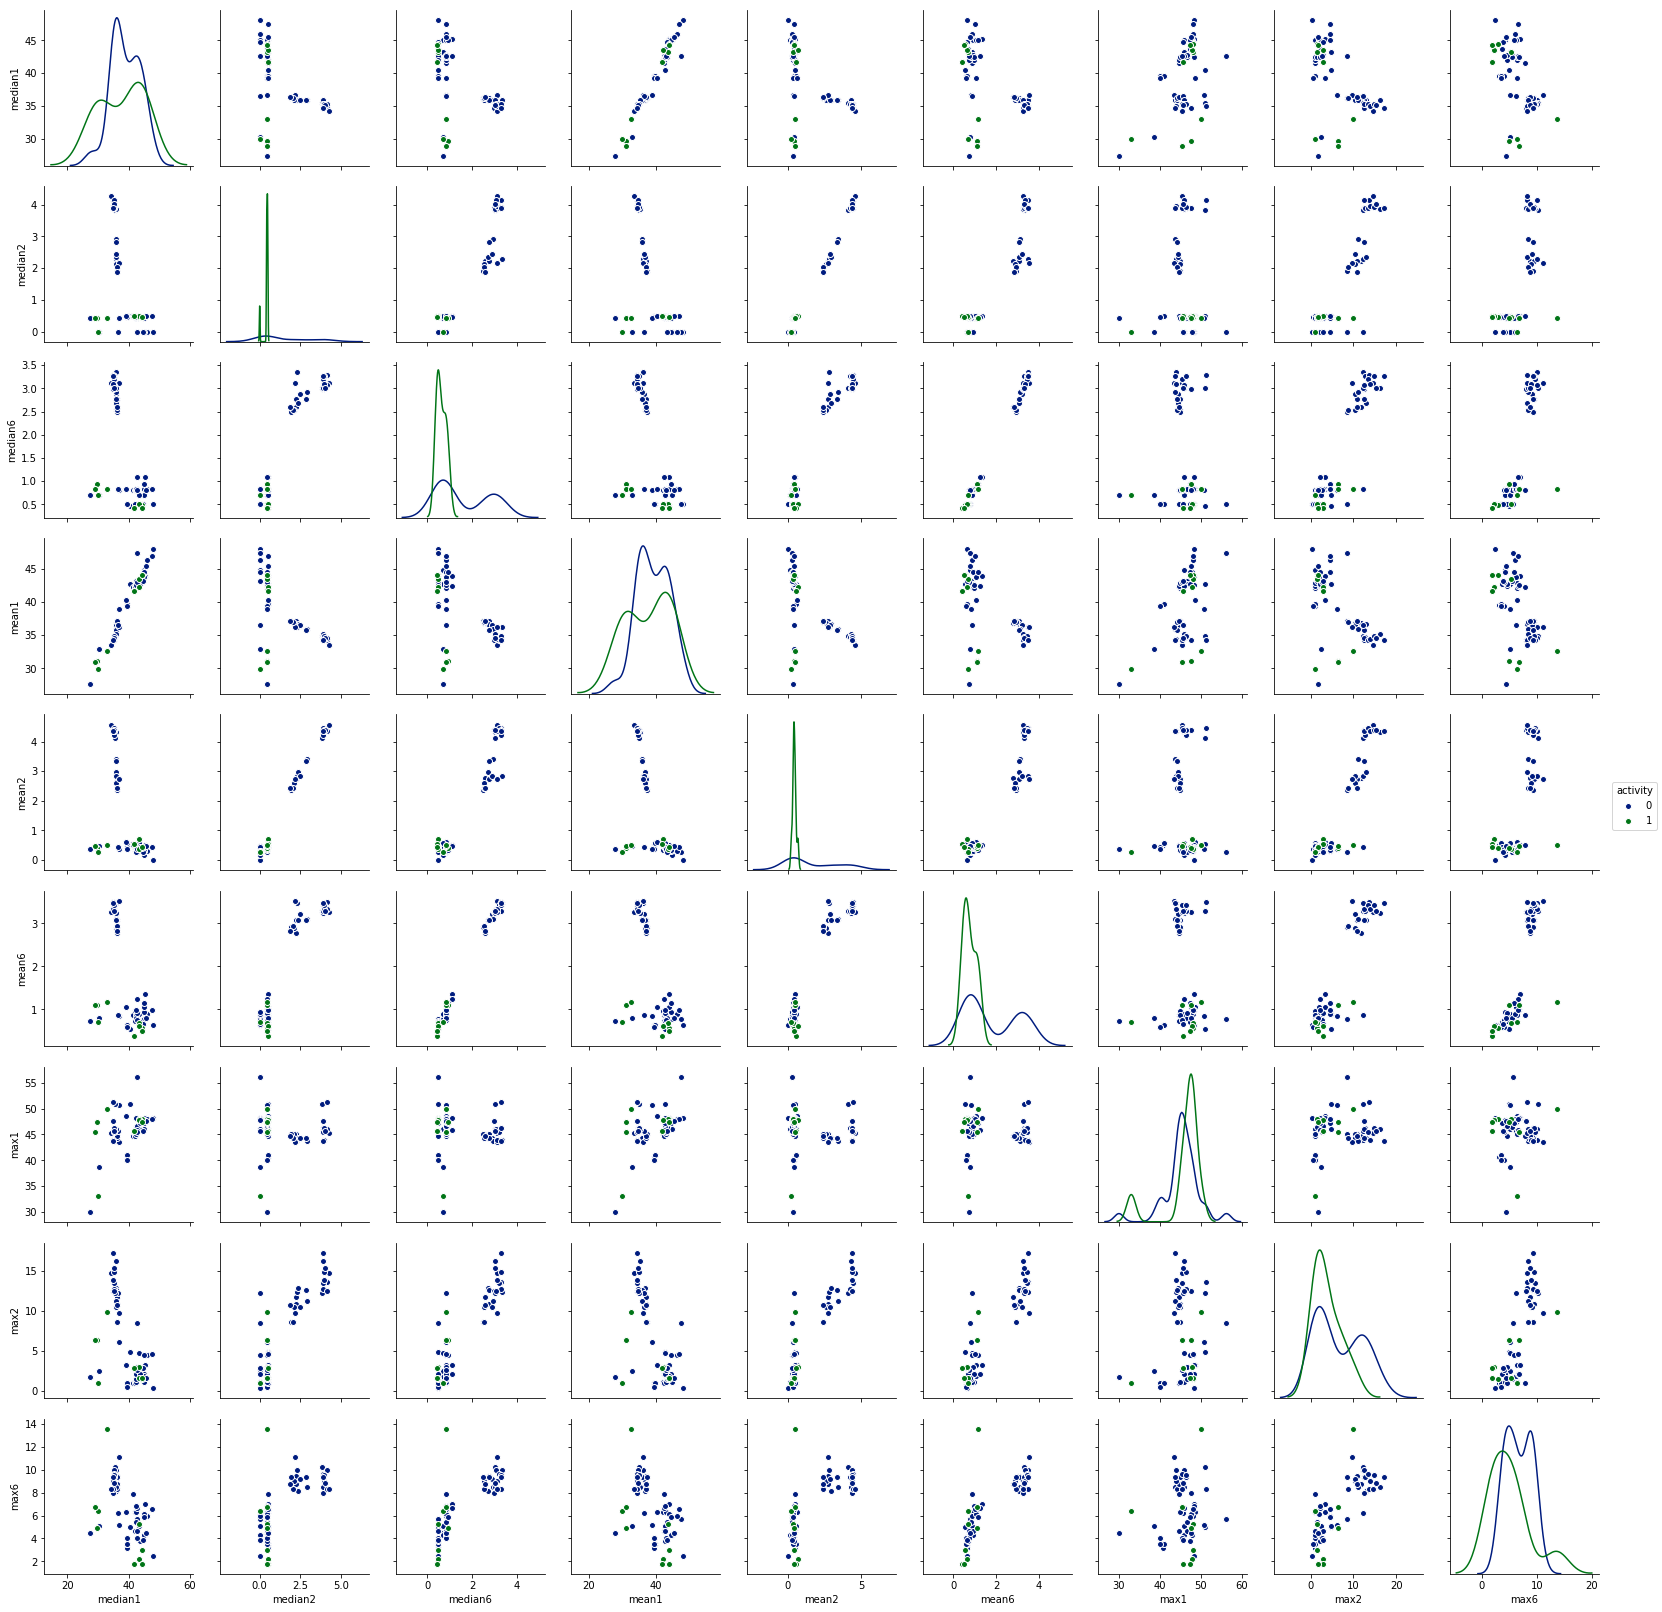

In [32]:

g = sns.pairplot(train,
                 vars=['median1','median2','median6','mean1','mean2','mean6','max1','max2','max6'],
                diag_kind='kde',
                 palette='dark',
                hue='activity')

### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [33]:
folders=['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
scaler= StandardScaler()    #Use this to standardize the predictors


temp1=['1','2','3','4','5','6']
temp2=['7','8','9','10','11','12']

top_dct=dict()
top_dct['Instance']=[]
for i in temp1:
    top_dct['min'+i]=[]
    top_dct['max'+i]=[]
    top_dct['mean'+i]=[]
    top_dct['median'+i]=[]
    top_dct['std.dev'+i]=[]
    top_dct['first.quart'+i]=[]
    top_dct['third.quart'+i]=[]

    
bottom_dct=dict()
bottom_dct['Instance']=[]
for i in temp2:
    bottom_dct['min'+i]=[]
    bottom_dct['max'+i]=[]
    bottom_dct['mean'+i]=[]
    bottom_dct['median'+i]=[]
    bottom_dct['std.dev'+i]=[]
    bottom_dct['first.quart'+i]=[]
    bottom_dct['third.quart'+i]=[]

instance=1 

for folder in folders:
    fileDir = os.path.dirname(os.path.realpath('__file__'))
    filename = os.path.join(fileDir, '../data/clean_data/'+folder)
    filename = os.path.abspath(os.path.realpath(filename))
    filenames = glob(filename+'/dataset*.csv')

    for f in filenames:
        df=pd.read_csv(f, skiprows=4, index_col='# Columns: time')
        top=df.iloc[:240,:]
        bottom=df.iloc[240:,:]
        #scaled_top=scaler.fit_transform(top)    #Standardize all of the columns
        #scaled_bottom=scaler.fit_transform(bottom)
        scaled_top=top.copy()
        scaled_bottom=bottom.copy()
        
        
        #Instance column
        top_dct['Instance'].append(instance)
        bottom_dct['Instance'].append(instance)
        instance=instance+1
                        
        #min
        minimum=np.min(scaled_top, axis=0)
        for i in range(len(minimum)):
            top_dct['min'+str(i+1)].append(minimum[i])
            
        minimum2=np.min(scaled_bottom, axis=0)
        for i in range(len(minimum2)):
            bottom_dct['min'+str(i+7)].append(minimum2[i])
        
        #max
        maximum=np.max(scaled_top, axis=0)
        for i in range(len(maximum)):
            top_dct['max'+str(i+1)].append(maximum[i])
            
        maximum2=np.max(scaled_bottom, axis=0)
        for i in range(len(maximum2)):
            bottom_dct['max'+str(i+7)].append(maximum2[i])
        
        #mean
        mean=np.mean(scaled_top, axis=0)
        for i in range(len(mean)):
            top_dct['mean'+str(i+1)].append(mean[i])
            
        mean2=np.mean(scaled_bottom, axis=0)
        for i in range(len(mean2)):
            bottom_dct['mean'+str(i+7)].append(mean2[i])
            
        #median
        med=np.median(scaled_top, axis=0)
        for i in range(len(med)):
            top_dct['median'+str(i+1)].append(med[i])
            
        med2=np.median(scaled_bottom, axis=0)
        for i in range(len(med2)):
            bottom_dct['median'+str(i+7)].append(med2[i])
            
        #standard deviation
        dev=np.std(scaled_top, axis=0)
        for i in range(len(dev)):
            top_dct['std.dev'+str(i+1)].append(dev[i])
            
        dev2=np.std(scaled_bottom, axis=0)
        for i in range(len(dev2)):
            bottom_dct['std.dev'+str(i+7)].append(dev2[i])
            
        #first quartile
        firstq=np.percentile(scaled_top, 25, axis=0)
        for i in range(len(firstq)):
            top_dct['first.quart'+str(i+1)].append(firstq[i])
            
        firstq2=np.percentile(scaled_bottom, 25, axis=0)
        for i in range(len(firstq2)):
            bottom_dct['first.quart'+str(i+7)].append(firstq2[i])
            
        #third quartile
        thirdq=np.percentile(scaled_top, 75, axis=0)
        for i in range(len(thirdq)):
            top_dct['third.quart'+str(i+1)].append(thirdq[i])
            
        thirdq2=np.percentile(scaled_bottom, 75, axis=0)
        for i in range(len(thirdq2)):
            bottom_dct['third.quart'+str(i+7)].append(thirdq2[i])
            
top_dataset=pd.DataFrame(top_dct)
top_dataset.set_index('Instance', inplace = True)

bottom_dataset=pd.DataFrame(bottom_dct)
bottom_dataset.set_index('Instance', inplace = True)

combined_dataset=pd.concat([top_dataset,bottom_dataset], axis=1)
#combined_dataset=scaler.fit_transform(combined_dataset)

combined_dataset.loc[:,'activity']=summary.loc[:,'activity']
combined_dataset.loc[combined_dataset.activity == "bending1", "activity"] = 1
combined_dataset.loc[combined_dataset.activity == "bending2", "activity"] = 1
combined_dataset.loc[combined_dataset.activity != 1, "activity"] = 0
combined_dataset.loc[:,'type']=summary.loc[:,'type']
combined_dataset.head()

#BENDING=1
#OTHER=0

,first.quart1,first.quart2,first.quart3,first.quart4,first.quart5,first.quart6,max1,max2,max3,max4,...,std.dev8,std.dev9,third.quart10,third.quart11,third.quart12,third.quart7,third.quart8,third.quart9,activity,type
Instance,,,,,,,,,,,,,,,,,,,,,
1,42.3300,0.00,14.6275,0.00,19.25,0.00,45.00,1.30,26.33,5.17,...,0.235002,3.925231,0.8875,23.5000,0.83,44.75,0.5000,18.00,1,train
2,43.5000,0.00,15.1875,0.47,21.75,0.43,48.00,1.30,27.00,10.03,...,0.260217,2.433343,0.8225,23.7500,0.71,43.00,0.5000,15.00,1,train
3,42.0000,0.00,21.5000,0.43,36.00,0.00,47.75,3.00,30.00,4.77,...,0.626606,4.175005,1.4800,33.7500,0.87,44.50,1.2275,24.00,1,train
4,39.6525,0.43,15.2500,0.43,28.50,0.00,45.75,2.83,28.25,6.42,...,0.272481,2.719666,0.8300,30.5625,0.50,42.00,0.5000,20.75,1,train
5,40.3100,0.00,15.9375,0.00,33.00,0.00,42.33,1.22,25.67,7.23,...,0.316130,4.423530,1.4250,36.5000,0.94,42.00,0.5000,24.00,1,test


In [34]:
#Make training set
#Create Training set
train_break=combined_dataset[combined_dataset['type']=='train']


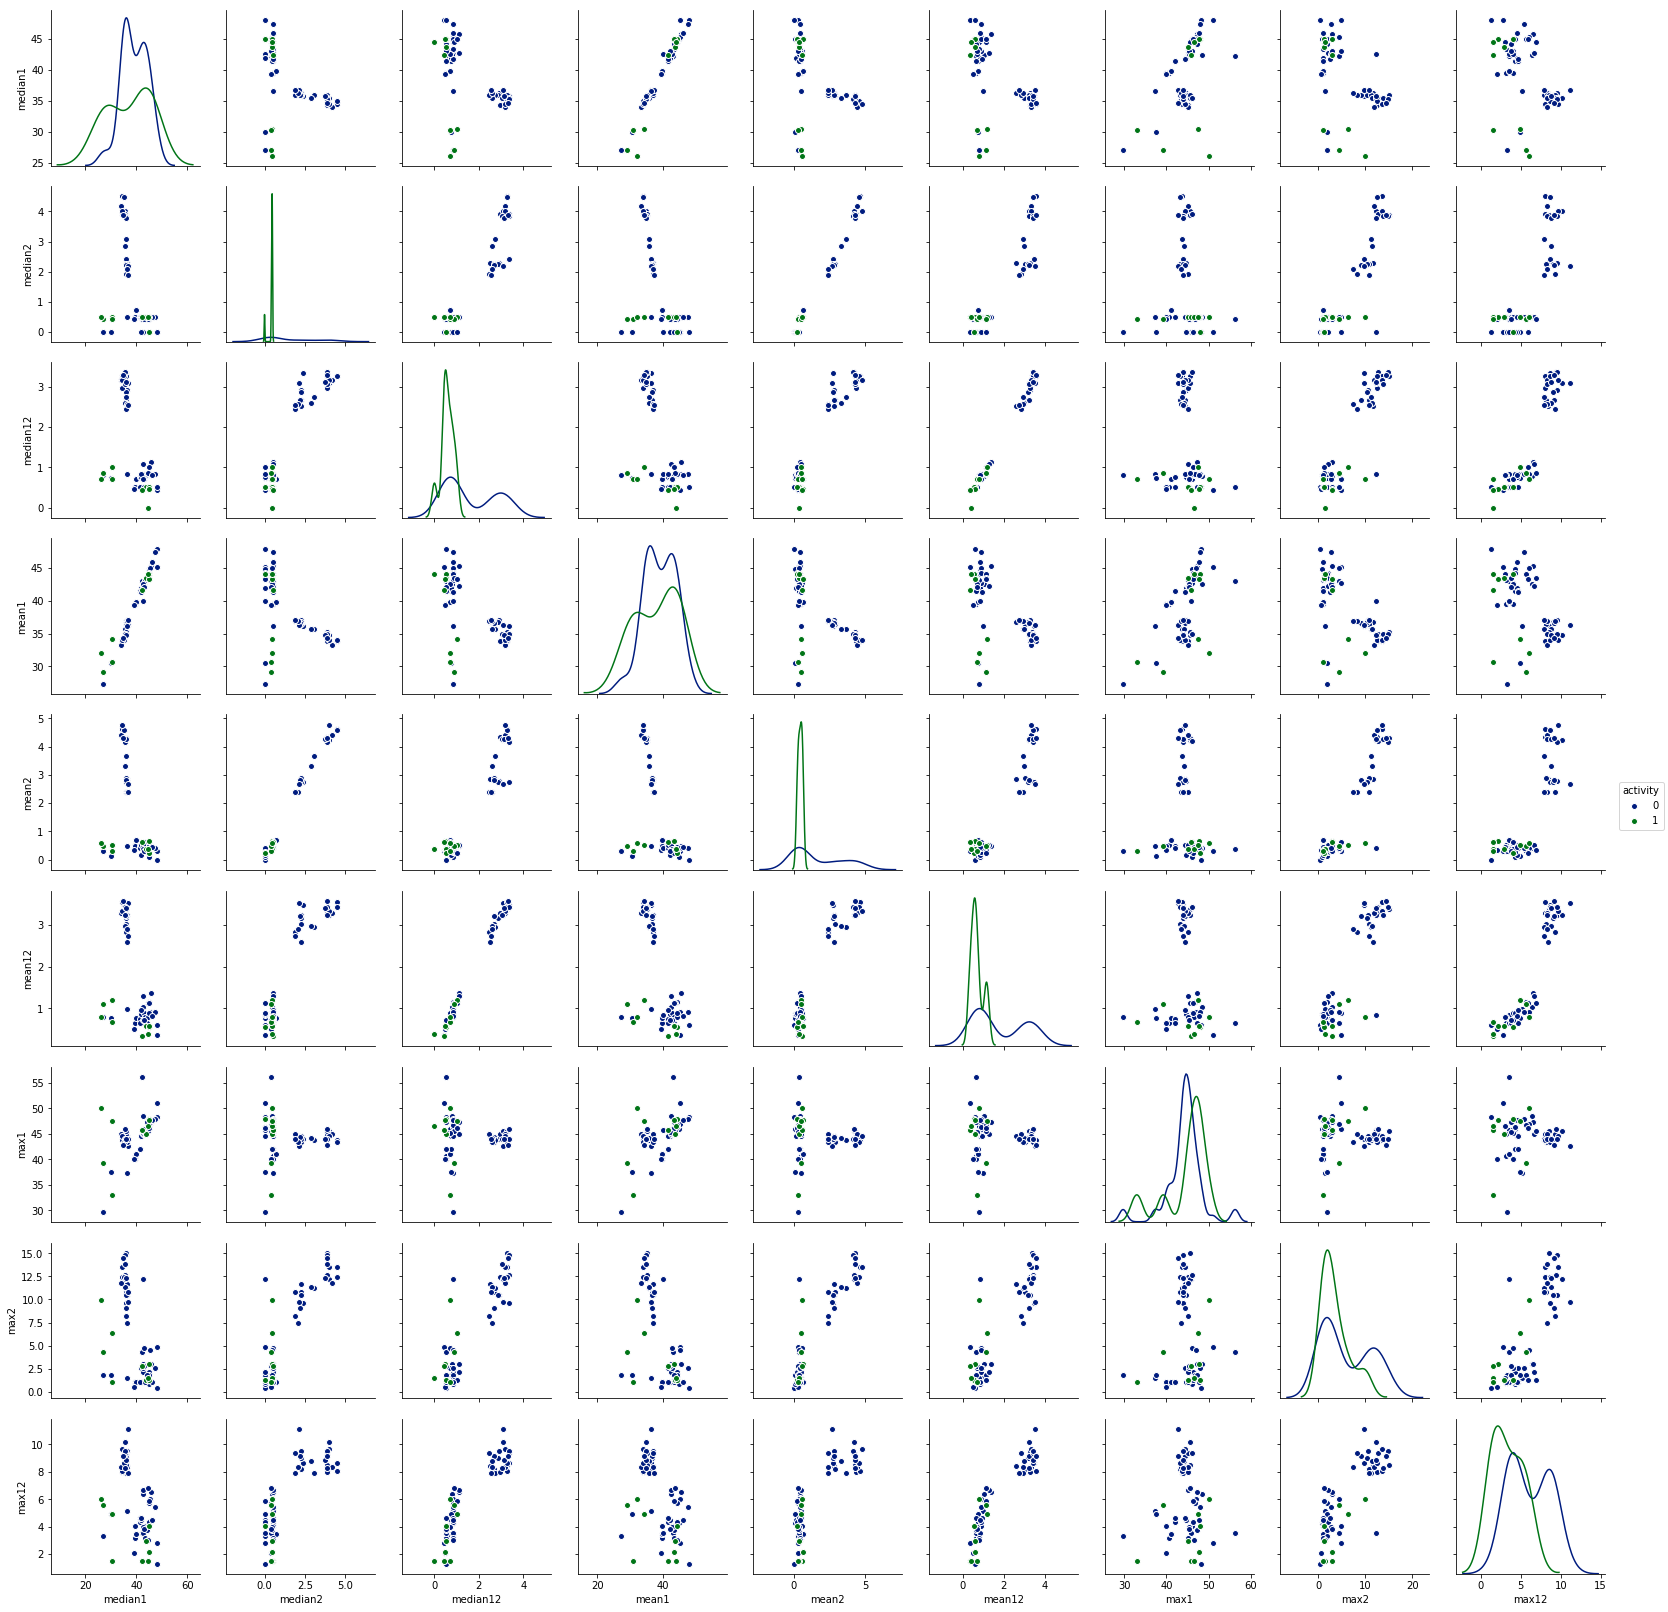

In [35]:
g2 = sns.pairplot(train_break,
                 vars=['median1','median2','median12','mean1','mean2','mean12','max1','max2','max12'],
                diag_kind='kde',
                 palette='dark',
                hue='activity')

#### I am not seeing any considerable difference with the results. It does however appear that after breaking the datasets intow two chunks, we are showing more defined clusters for max12 than we were for max 6. 

### iii. Break each time series in your training set into l element of {1,2,...,20} time series of approximately equal length and use logistic regression to solve the bindary classification problem, using time-domain features....

In [53]:
dataframes=list()
set_size=np.arange(1,21,1)
#set_size=[1,2,3]

folders=['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing', 'walking']
#scaler= StandardScaler()    #Use this to standardize the predictors

for num in set_size:
    temp=np.arange(1,(6*num)+1,1)
    

    dct=dict()
    dct['Instance']=[]
    for i in temp:
        dct['min'+str(i)]=[]
        dct['max'+str(i)]=[]
        dct['mean'+str(i)]=[]
        dct['median'+str(i)]=[]
        dct['std.dev'+str(i)]=[]
        dct['first.quart'+str(i)]=[]
        dct['third.quart'+str(i)]=[]
    #print(dct)
    instance=1 

    for folder in folders:
        fileDir = os.path.dirname(os.path.realpath('__file__'))
        filename = os.path.join(fileDir, '../data/clean_data/'+folder)
        filename = os.path.abspath(os.path.realpath(filename))
        filenames = glob(filename+'/dataset*.csv')

        for f in filenames:
            df=pd.read_csv(f, skiprows=4, index_col='# Columns: time')
            chunks=np.array_split(df, num)
            scale=1
            
            #Instance column
            dct['Instance'].append(instance)
                
            for chunk in chunks:
                #scaled_chunk=scaler.fit_transform(chunk)    #Standardize all of the columns
                scaled_chunk=chunk

                #min
                minimum=np.min(scaled_chunk, axis=0)
                for j in range(len(minimum)):
                    dct['min'+str(j+scale)].append(minimum[j])

                #max
                maximum=np.max(scaled_chunk, axis=0)
                for j in range(len(maximum)):
                    dct['max'+str(j+scale)].append(maximum[j])

                #mean
                mean=np.mean(scaled_chunk, axis=0)
                for j in range(len(mean)):
                    dct['mean'+str(j+scale)].append(mean[j])

                #median
                med=np.median(scaled_chunk, axis=0)
                for j in range(len(med)):
                    dct['median'+str(j+scale)].append(med[j])

                #standard deviation
                dev=np.std(scaled_chunk, axis=0)
                for j in range(len(dev)):
                    dct['std.dev'+str(j+scale)].append(dev[j])

                #first quartile
                firstq=np.percentile(scaled_chunk, 25, axis=0)
                for j in range(len(firstq)):
                    dct['first.quart'+str(j+scale)].append(firstq[j])

                #third quartile
                thirdq=np.percentile(scaled_chunk, 75, axis=0)
                for j in range(len(thirdq)):
                    dct['third.quart'+str(j+scale)].append(thirdq[j])
                    
                scale=scale+6
                    
            instance=instance+1
    
    #length_dict = {key: len(value) for key, value in dct.items()}
    #print(length_dict)
    #for k,v in length_dict.items():
        #print(v)
    dataset_d=pd.DataFrame(dct)
    dataset_d.set_index('Instance', inplace = True)
    #dataset_d=scaler.fit_transform(dataset_d)
    dataset_d.loc[:,'activity']=summary.loc[:,'activity']
    dataset_d.loc[dataset_d.activity == "bending1", "activity"] = 1
    dataset_d.loc[dataset_d.activity == "bending2", "activity"] = 1
    dataset_d.loc[dataset_d.activity != 1, "activity"] = 0
    dataset_d.loc[:,'type']=summary.loc[:,'type']
    dataframes.append(dataset_d)



In [40]:
results={'Frame_num':[],'Features_num':[],'Accuracy':[],'grid_scores':[],'features':[],'criteria':[],'Accuracy_check':[]}
results=pd.DataFrame(results)

frame_count=1

for frame in dataframes:
    frame=frame[frame['type']=='train']
    data=frame.iloc[:,:-2]
    target=frame.iloc[:,-2]
        
    rf = LogisticRegression(C=float('inf'), n_jobs=-1, max_iter=1000)
    rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv.fit(data, target)

    criteria=rfecv.support_
    features=data.iloc[:,criteria]    #We are taking just the columns suggested by RFE
    features=features.columns
    feat=rfecv.n_features_
    grid=rfecv.grid_scores_
    acc=max(grid)
    acc_check=grid[feat-1]
    


    #print(avg_MSE)
    new_row={'Frame_num':frame_count,'Features_num':feat,'Accuracy':acc,'Accuracy_check':acc_check,'grid_scores':grid,'features':features, 'criteria':criteria}
    results = results.append(new_row, ignore_index=True)

    #print(rfe.ranking_)
        
    frame_count =frame_count+1
    
results

,Accuracy,Accuracy_check,Features_num,Frame_num,criteria,features,grid_scores
0,0.893333,0.893333,14.0,1.0,"[True, False, False, False, True, False, False...","Index(['first.quart1', 'first.quart5', 'max2',...","[0.6599999999999999, 0.5666666666666667, 0.866..."
1,0.693333,0.693333,8.0,2.0,"[False, False, False, False, False, False, Fal...","Index(['first.quart5', 'max1', 'max2', 'max5',...","[0.3333333333333333, 0.6266666666666667, 0.653..."
2,0.960000,0.960000,5.0,3.0,"[False, False, False, False, False, False, Fal...","Index(['max18', 'max5', 'min5', 'third.quart5'...","[0.9333333333333332, 0.7999999999999999, 0.799..."
3,0.826667,0.826667,3.0,4.0,"[False, False, False, False, False, False, Fal...","Index(['first.quart5', 'min11', 'third.quart13...","[0.52, 0.5599999999999999, 0.8266666666666665,..."
4,0.893333,0.893333,2.0,5.0,"[False, False, False, False, False, False, Fal...","Index(['mean5', 'third.quart19'], dtype='object')","[0.76, 0.8933333333333333, 0.6933333333333334,..."
5,0.826667,0.826667,7.0,6.0,"[False, False, False, False, False, False, Fal...","Index(['max8', 'mean5', 'median19', 'min11', '...","[0.52, 0.36, 0.6933333333333334, 0.69333333333..."
6,0.933333,0.933333,3.0,7.0,"[False, False, False, False, False, False, Fal...","Index(['max19', 'min11', 'third.quart5'], dtyp...","[0.6599999999999999, 0.76, 0.9333333333333332,..."
7,0.766667,0.766667,12.0,8.0,"[False, False, True, False, False, False, Fals...","Index(['first.quart11', 'first.quart17', 'max3...","[0.42666666666666664, 0.7238095238095238, 0.61..."
8,0.893333,0.893333,34.0,9.0,"[False, False, True, False, False, False, Fals...","Index(['first.quart11', 'first.quart17', 'firs...","[0.4666666666666666, 0.44761904761904764, 0.66..."
9,0.893333,0.893333,370.0,10.0,"[True, True, True, True, True, True, True, Tru...","Index(['first.quart1', 'first.quart10', 'first...","[0.5599999999999999, 0.5333333333333333, 0.626..."


#### Answer: After running for accuracy and f1 scores, I obtained ties for 8 unique (l,p) combinations. You can see these combinations above with scores of 1.0 in the 'Accuracy' column. I have decided to choose the dataframe with 15 splits and 9 features because this winner has the fewest features. 
#### The wrong way to apply cross-validation would be to apply it after we already choose our features. If we wait to apply cross-validation to step 2, then the procedure in step 1 would have already seen the labels of the training data, and made us of them. Choosing the optimal p features is a form of training and must be included in the validation process. Thus, the right way to apply cross-validation would be to apply it to both steps: choosing our p features, then applying the classifer.

### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression Bi's as well asthe p-values associated with them.

In [52]:

#Choose dataframe # and features to refit a logistic regression to


#Frame
choose_frame=15
frame=dataframes[choose_frame-1]
frame=frame[frame['type']=='train']
data=frame.iloc[:,:-2]
target=frame.iloc[:,-2]

#Features
#######DONT FORGET TO CHANGE THIS AND THE NUMBER 15 ABOVE
criteria=results.loc[14,'criteria']
data=data.iloc[:,criteria]




In [94]:
#Cross Fold
MSEs=list()
skf = StratifiedKFold(n_splits=5)

for train_index, val_index in skf.split(data, target):

    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    logreg = LogisticRegression(C=float('inf'), n_jobs=-1, max_iter=1000)
    logreg.fit(X_train, y_train)
    val_pred=logreg.predict(X_val)
    val_err=1-metrics.accuracy_score(y_val, val_pred)
    MSEs.append(test_err)
    
CV_testErr=sum(MSEs)/len(MSEs)
print('Predicted Test Error, based on 5-fold cross validation with training set:',CV_testErr)

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.0

In [55]:
logreg = LogisticRegression(C=float('inf'), n_jobs=-1, max_iter=1000)
logreg.fit(data, target)
train_pred=logreg.predict(data)
cmat=metrics.confusion_matrix(target, train_pred)
print('Confusion Matrix:\n',cmat)

Confusion Matrix:
 [[60  0]
 [ 0  9]]


In [56]:
print('Coefficients are as follows:',logreg.coef_)

Coefficients are as follows: [[ 0.80505562 -0.68359551 -0.71638081  0.73631479  0.73752314  0.83257482
   0.87276404  0.74923077 -0.63808738]]


In [61]:
cos=logreg.coef_.ravel()
cols=data.columns
coeffs_df={'Feature':cols,'Parameters':cos}
coeffs_df=pd.DataFrame(coeffs_df)
coeffs_df

,Feature,Parameters
0,first.quart17,0.805056
1,max49,-0.683596
2,max61,-0.716381
3,median11,0.736315
4,median17,0.737523
5,min11,0.832575
6,min29,0.872764
7,min83,0.749231
8,third.quart49,-0.638087


AUC: 1.0
ROC is plotted below:


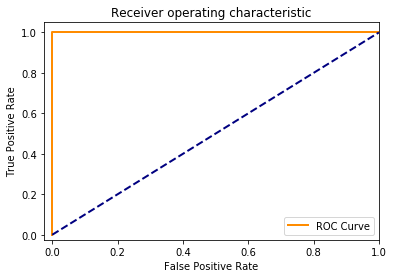

In [62]:
#Plot the ROC and AUC
#Do I need to do cross-validation for this?
lr_probs = logreg.predict_proba(data)
lr_probs = lr_probs[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(target, lr_probs)
auc=metrics.auc(fpr,tpr)
print('AUC:',auc)
print('ROC is plotted below:')
#try rocaucscore
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

#### I sourced the above logit_pvalue function from StackOVerflow for calculating p-values for logistic regression in python. It was written by David Dale on November 2, 2017 and can be found at the following link: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance

In [64]:
ps=list(logit_pvalue(logreg, data))
print('p-values are as follows:',ps)

p-values are as follows: [0.9999995040167933, 0.9998682452500123, 0.9999238709504725, 0.999820146762959, 0.9997579538022654, 0.9998876834519719, 0.9997257911433484, 0.9990408214321658, 0.9981326936178778, 0.9999016562714025]


### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [65]:
#Frame
choose_frame=15
frame=dataframes[choose_frame-1]
frame=frame[frame['type']=='test']
data=frame.iloc[:,:-2]
target=frame.iloc[:,-2]

#Features
criteria=results.loc[14,'criteria']
data=data.iloc[:,criteria]


test_pred=logreg.predict(data)
test_err=1-metrics.accuracy_score(target, test_pred)
print('Test Error:', test_err)

Test Error: 0.0


In [67]:
cmat=metrics.confusion_matrix(target, test_pred)
print('Confusion Matrix:\n',cmat)

Confusion Matrix:
 [[15  0]
 [ 0  4]]


#### The test performed just as well as the train. The accuracy for both was 1.0.

### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

#### No, I dont think the classes seem to be well-separated. This is supported by the fact that the coefficients for the predictors are relaitvely small. If the classes were very separated, we would expect the magnitude of the coefficients to move toward infinity. Also, when we look at the scatterplots of the different features against one another, classes do not appear to be well seperated in different clusters.

### vii. From the confusion matrices you obtained, do you see imbalanced classes? 

#### Yes, the confusion matrixes show that the classes are very imbalanced. For the test set, there are 15 instances of one class and only 4 of the other. For the training set, there are 60 instances of one class and only 9 of the other.

Confusion Matrix:
 [[60  0]
 [ 0 60]]
AUC: 1.0
The ROC curve is plotted below:


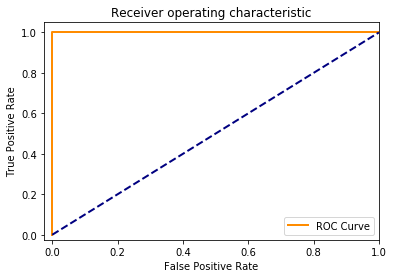

In [68]:
#Frame
choose_frame=15
frame=dataframes[choose_frame-1]
frame=frame[frame['type']=='train']
data=frame.iloc[:,:-2]
target=frame.iloc[:,-2]

#Features
criteria=results.loc[14,'criteria']
data=data.iloc[:,criteria]


#Logistic Regression using case-control sampling
smo = SMOTE()
data, target = smo.fit_resample(data, target)

#Confusion Matrix
logreg = LogisticRegression(C=float('inf'), n_jobs=-1, max_iter=1000)
logreg.fit(data, target)
train_pred=logreg.predict(data)
cmat=metrics.confusion_matrix(target, train_pred)
print('Confusion Matrix:\n',cmat)


#Plot the ROC and AUC
#Do I need to do cross-validation for this?
lr_probs = logreg.predict_proba(data)
lr_probs = lr_probs[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(target, lr_probs)
auc=metrics.auc(fpr,tpr)
print('AUC:', auc)
print('The ROC curve is plotted below:')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### (e) Binary Classification Using L1-oenalized logistic regression
### i. Repeat 1(d) iii using L1-penalized logistic regression, ie.e instead of using p-values for variable selection, use >1 regularization. Note that in this problem, you have to cross validate for both l, the number of times series into which you break each of your instnaces, and lambda, the weight or L1 penalty in your logistic regression objective function (of C, the budget). Packages usually perform cross-validation for lambda automatically. 

In [69]:
#Use GridSearchCV
#I set dual=false to fix the convergence warning
#try smote first
c_param=np.logspace(-2,4,base=10,num=7,dtype='float')

model=LogisticRegression(penalty='l1',solver='liblinear', dual=False, max_iter=1000)

scaler=StandardScaler()
Lresults={'Frame_num':[],'Features_number':[],'Best_params':[],'Best_Score':[]}
Lresults=pd.DataFrame(Lresults)
frame_count=1

for frame in dataframes:
    frame=frame[frame['type']=='train']
    data=frame.iloc[:,:-2]
    
    target=frame.iloc[:,-2] 
    
    smo = SMOTE()
    data, target = smo.fit_resample(data, target)
    data_scaled=scaler.fit_transform(data)
    
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    skf=StratifiedKFold(n_splits=5)
    
    g_search=GridSearchCV(estimator=rfecv, cv=skf, param_grid={'estimator__C':c_param},scoring='accuracy')
    g_search.fit(data_scaled, target)
    
    feats=g_search.best_estimator_.n_features_
    best=g_search.best_params_
    score=g_search.best_score_

    new_row={'Frame_num':frame_count,'Features_number':feats,'Best_params':best,'Best_Score':score}
    Lresults = Lresults.append(new_row, ignore_index=True)

    frame_count=frame_count+1
    
Lresults

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to conver

,Best_Score,Best_params,Features_number,Frame_num
0,0.991667,{'estimator__C': 1.0},4.0,1.0
1,0.991667,{'estimator__C': 10.0},3.0,2.0
2,0.991667,{'estimator__C': 1.0},3.0,3.0
3,0.975000,{'estimator__C': 1.0},3.0,4.0
4,0.983333,{'estimator__C': 0.1},4.0,5.0
5,1.000000,{'estimator__C': 100.0},25.0,6.0
6,1.000000,{'estimator__C': 100.0},4.0,7.0
7,0.991667,{'estimator__C': 10.0},4.0,8.0
8,0.983333,{'estimator__C': 1.0},4.0,9.0
9,0.991667,{'estimator__C': 0.1},4.0,10.0


#### I got ties for a number of the folds and different numbers of features with an accuracy of 1. After doing some research, I set dual=False and max_iter=1000 in order to decrease the number of convergence warnings - it was affective in doing so. I have decided to choose the dataframe with 20 folds and two features because I like the fact that it only utilizes 2 features and yields an accuracy of 1. This model used a c value of 1.0. I will now test this model on the test data to calculate the error rate.

In [54]:
#Frame
choose_frame=20
criteria=['first.quart11','max37']
frame=dataframes[choose_frame-1]
trn=frame[frame['type']=='train']
tst=frame[frame['type']=='test']
data=trn.iloc[:,:-2]
target=trn.iloc[:,-2]
x_tst=tst.iloc[:,:-2]
y_tst=tst.iloc[:,-2]



#Features
data=data.loc[:,criteria]
x_tst=x_tst.loc[:,criteria]
Lmodel= LogisticRegression(C=1.0, n_jobs=-1, max_iter=1000, penalty='l1',solver='liblinear')
Lmodel.fit(data, target)

test_pred=Lmodel.predict(x_tst)
test_err=1-metrics.accuracy_score(y_tst, test_pred)
print('Test Error:', test_err)

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Test Error: 0.0


### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

#### Both methods performed equally well as each resulted in a test error of 0. From a coding perspective, it was easier to implement L1-penalized. This might have been due to the fact that I used GridSearchCV. As far as computation time is concerned, L1-penalized took my computer a lot longer to run.

### (f) Multi-class Classification (The Realistic Case)
### i. Find the best l in the same way as you found it in 1(e)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [88]:
#Create the dataframes with the multiple classes
#Matrices work just fine, see below
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

#ROC Curve can also be done:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=ROC%20curves%20typically%20feature%20true,rate%20on%20the%20X%20axis.&text=ROC%20curves%20are%20typically%20used,necessary%20to%20binarize%20the%20output.

m_param=np.logspace(-2,4,base=10,num=7,dtype='float')

mmodel=LogisticRegression(penalty='l1',solver='liblinear', dual=False, max_iter=1000, multi_class='multinomial')

scaler=StandardScaler()
Mresults={'Frame_num':[],'Features_number':[],'Best_params':[],'Best_Score':[]}
Mresults=pd.DataFrame(Lresults)
frame_count=1


for frame in dataframes:
    frame.loc[:,'activity']=summary.loc[:,'activity']
    frame=frame[frame['type']=='train']
    data=frame.iloc[:,:-2]
    data_scaled=scaler.fit_transform(data)
    target=frame.iloc[:,-2]
    target.loc[target.activity == "bending1", "activity"] = 1
    target.loc[target.activity == "bending2", "activity"] = 2
    target.loc[target.activity == "cycling", "activity"] = 3
    target.loc[target.activity == "lying", "activity"] = 4
    target.loc[target.activity == "sitting", "activity"] = 5
    target.loc[target.activity == "standing", "activity"] = 6
    target.loc[target.activity == "walking", "activity"] = 7
    
    smo = SMOTE()
    data, target = smo.fit_resample(data, target)
    data_scaled=scaler.fit_transform(data)
    
    rfecv = RFECV(estimator=mmodel, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    skf=StratifiedKFold(n_splits=5)
    
    g_search=GridSearchCV(estimator=rfecv, cv=skf, param_grid={'estimator__C':c_param},scoring='accuracy')
    g_search.fit(data_scaled, target)
    
    feats=g_search.best_estimator_.n_features_
    best=g_search.best_params_
    score=g_search.best_score_

    new_row={'Frame_num':frame_count,'Features_number':feats,'Best_params':best,'Best_Score':score}
    Mresults = Mresults.append(new_row, ignore_index=True)

    frame_count=frame_count+1
    
Mresults

    
  
    

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0,

#### Yes, it is possible to use create confusion matrixes and ROC curves for multiclass classification. My research led me to these two links where I got the majority of my information. 
https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826<br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=ROC%20curves%20typically%20feature%20true,rate%20on%20the%20X%20axis.&text=ROC%20curves%20are%20typically%20used,necessary%20to%20binarize%20the%20output.
<br>

#### As it concerns ROC, for multiclass, the sklearn link above says the following:<br>
"ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

Another evaluation measure for multi-label classification is macro-averaging, which gives equal weight to the classification of each label."

### ii. Repeat 1(f)i using a Naive Baye's classifier. Use both Gaussian and Multinomial priors and compare the results.

In [ ]:
#https://scikit-learn.org/stable/modules/naive_bayes.html

In [ ]:
#Gaussian
gnb = GaussianNB()




In [ ]:
#Multinomial
mnb = MutinomialNB()




### iii. Which method is better for multi-class classification in this problem?

#### Gaussian is better for multiclass classification because of the fact that it performs better than multinomial when p is large than n.  

### ISLR 3.7.4
### I collect a set of data (n=100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.3. Y=.....
### (a) Suppose that the true relationship between X and Y is linear. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

#### Answer: We would expect the cubic regression model to have a lower training RSS. Because the cubic regression model is more flexible than the linear regression model, it will more closely fit to the training data points, and thus the distances from the observed values and the predicted values will be smaller for the cubic regression model. RSS is calculated as the sum of squard residuals, where each residual is the actual value minuse the predicted value of yi.

### (b) Answer (a) using test rather than training RSS.

#### Answer: We would expect the linear regression model to have a lower test RSS. Because the true relationship between X and Y is linear, we would expect a linear model to have a lower test RSS. Since the cubic regression model is flexible as mentioned in question (1), it will fit the training data very closely (it is likely to overfit the training data), and thus when new data is tested on the model, the overfit cubic regression model will perform poorly on the test data.

### (c) Suppose that the true relationship between X and Y is not linear, but we don't know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect them to be the same, or is there not enough information to tell? Justify your answer.

#### Answer: We would expect the cubic regression model to have a lower training RSS. Because the cubic regression model is more flexible than the linear regression model, it will more closely fit to the training data points, and thus the distances from the observed values and the predicted values will be smaller for the cubic regression model. RSS is calculated as the sum of squard residuals, where each residual is the actual value minuse the predicted value of yi.

### (d) Answer (c) using test rather than training RSS.

#### Answer: There is not enough information to tell. Because we do not know the true amount of flexibility that is needed in a model in order to predict the relationship, we don't know which regression model (linear or cubic) would better predict the test data and thus we do not have enough information to suggest which model would result in a lower test RSS.

### ISLR 4.7.3
### This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-specific mean vextor and a class specific covariance matrix....Argue that it is in fact quadratic.

![](islr4.7.3.jpg)

### ISLR 4.7.7
### Suppose that we wish to predict whether a given stock will issue a dividend this year ("Yes" or "No) based on X, last year's percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was Xbar=10,.....predict the probability that a company will issue a dividend this year given that its percentage profit was X=4 last year.

![](islr4.7.7.jpg)